### Informações do grupo 3
- Nomes: Ricardo Endres,
- Turma: 1008
- link dataset: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

## Objetivo Principal do Conjunto de Dados

O objetivo principal deste conjunto de dados é fornecer insights sobre os fatores que afetam os salários dos profissionais na área de ciência de dados. Ele pode ser usado para responder perguntas como:

* Qual é o salário médio anual em empresas de médio porte nos EUA nos anos de 2022 e 2023?
* Como o salário médio varia de acordo com o nível de experiência para engenheiros de dados e cientistas de dados em empresas de médio porte nos EUA?
* Quais são os salários médios do cargo para cargos de nível inicial/júnior em empresas de pequeno, médio e grande porte?
* Como estão ganhando os Data Scientists que trabalham presencialmente em comparação com os que trabalham remotamente?

### Importância para as Empresas

Esta informação seria interessante para ajustar os perfis dos profissionais dentro das empresas.

* Será que conseguimos predizer, conforme as características dadas, se o perfil do profissional se encaixa na profissão Data Scientist?
  * Esta informação seria interessante para ajustar os perfis dos profissionais dentro das empresas.

* Se o profissional ocupa o cargo de Data Scientist, conforme suas características, ele estaria na faixa salarial correta?
  * Esta informação seria interessante para ajustar valores de salários conforme as características do profissional, dentro das empresas.


In [1]:
# importe as principais bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Carregando os dados
df_original = pd.read_csv('ds_salaries.csv')
df_original.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
df_original.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Legenda - Descrição das colunas
* <b>work_year</b>: O nível salarial no ano específico em que foi pago.
* <b>experience_level</b>: O nível de experiência do funcionário
* <b>Employment_type</b>: O tipo de emprego
* <b>job_title</b>: A função/cargo do funcionário
* <b>salary</b>: o valor total do salário bruto
* <b>salary_currency</b>: A moeda do salário pago
* <b>salary_in_usd</b>: O salário em dólares americanos
* <b>Employee_residence</b>: País de residência do funcionário
* <b>remote_ratio</b>: A taxa de trabalho realizado remotamente
* <b>company_location</b>: O país onde fica a sede da empresa
* <b>company_size</b>: Tamanho da empresa com base no número de pessoas que trabalharam para a empresa*

In [5]:
# Dicionário de tradução de rótulos dos índices
traducao_indices = {
    "work_year": "ano_de_trabalho",
    "experience_level": "nivel_de_experiencia",
    "employment_type": "tipo_de_emprego",
    "job_title": "titulo_do_trabalho",
    "salary": "salario",
    "salary_currency": "moeda_do_salario",
    "salary_in_usd": "salario_em_usd",
    "employee_residence": "residencia_do_funcionario",
    "remote_ratio": "proporcao_remota",
    "company_location": "localizacao_da_empresa",
    "company_size": "tamanho_da_empresa"
}

In [6]:
df_traducao = df_original.copy()

df_traducao = df_traducao.rename(columns=traducao_indices)
# Traduzindo as colunas que consideramos necessárias
df_traducao['nivel_de_experiencia']=df_traducao['nivel_de_experiencia'].replace('SE','Senior')
df_traducao['nivel_de_experiencia']=df_traducao['nivel_de_experiencia'].replace('MI','Pleno')
df_traducao['nivel_de_experiencia']=df_traducao['nivel_de_experiencia'].replace('EN','Junior')
df_traducao['nivel_de_experiencia']=df_traducao['nivel_de_experiencia'].replace('EX','Especialista')

df_traducao['tamanho_da_empresa']=df_traducao['tamanho_da_empresa'].replace('S','Pequena')
df_traducao['tamanho_da_empresa']=df_traducao['tamanho_da_empresa'].replace('L','Grande')
df_traducao['tamanho_da_empresa']=df_traducao['tamanho_da_empresa'].replace('M','Media')

df_traducao['tipo_de_emprego']=df_traducao['tipo_de_emprego'].replace('FT','Tempo Integral')
df_traducao['tipo_de_emprego']=df_traducao['tipo_de_emprego'].replace('CT','Contrato')
df_traducao['tipo_de_emprego']=df_traducao['tipo_de_emprego'].replace('FL','Freelance')
df_traducao['tipo_de_emprego']=df_traducao['tipo_de_emprego'].replace('PT','Meio Período')
df_traducao.head()

,ano_de_trabalho,nivel_de_experiencia,tipo_de_emprego,titulo_do_trabalho,salario,moeda_do_salario,salario_em_usd,residencia_do_funcionario,proporcao_remota,localizacao_da_empresa,tamanho_da_empresa
0,2023,Senior,Tempo Integral,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Grande
1,2023,Pleno,Contrato,ML Engineer,30000,USD,30000,US,100,US,Pequena
2,2023,Pleno,Contrato,ML Engineer,25500,USD,25500,US,100,US,Pequena
3,2023,Senior,Tempo Integral,Data Scientist,175000,USD,175000,CA,100,CA,Media
4,2023,Senior,Tempo Integral,Data Scientist,120000,USD,120000,CA,100,CA,Media


In [7]:
# Verificando mais detalhes dos dados com o describe transposto
df_traducao.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ano_de_trabalho,3755.0,NaN,NaN,NaN,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
nivel_de_experiencia,3755,4,Senior,2516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_de_emprego,3755,4,Tempo Integral,3718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
titulo_do_trabalho,3755,93,Data Engineer,1040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salario,3755.0,NaN,NaN,NaN,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
moeda_do_salario,3755,20,USD,3224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salario_em_usd,3755.0,NaN,NaN,NaN,137570.38988,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
residencia_do_funcionario,3755,78,US,3004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
proporcao_remota,3755.0,NaN,NaN,NaN,46.271638,48.58905,0.0,0.0,0.0,100.0,100.0
localizacao_da_empresa,3755,72,US,3040,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Filtrando para termos somente detalhes dos 'Data Scientist'
data_scientist_df = df_traducao.loc[df_traducao['titulo_do_trabalho'] == 'Data Scientist']
data_scientist_df

,ano_de_trabalho,nivel_de_experiencia,tipo_de_emprego,titulo_do_trabalho,salario,moeda_do_salario,salario_em_usd,residencia_do_funcionario,proporcao_remota,localizacao_da_empresa,tamanho_da_empresa
3,2023,Senior,Tempo Integral,Data Scientist,175000,USD,175000,CA,100,CA,Media
4,2023,Senior,Tempo Integral,Data Scientist,120000,USD,120000,CA,100,CA,Media
7,2023,Senior,Tempo Integral,Data Scientist,219000,USD,219000,CA,0,CA,Media
8,2023,Senior,Tempo Integral,Data Scientist,141000,USD,141000,CA,0,CA,Media
9,2023,Senior,Tempo Integral,Data Scientist,147100,USD,147100,US,0,US,Media
...,...,...,...,...,...,...,...,...,...,...,...
3741,2020,Pleno,Tempo Integral,Data Scientist,118000,USD,118000,US,100,US,Media
3742,2020,Pleno,Tempo Integral,Data Scientist,138350,USD,138350,US,100,US,Media
3746,2021,Pleno,Tempo Integral,Data Scientist,160000,SGD,119059,SG,100,IL,Media
3750,2020,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,100,US,Grande


In [9]:
# Analisando media salarial em relação ao nivel de experiencia
Data_Scientist = data_scientist_df
Data_Scientist = Data_Scientist[['nivel_de_experiencia','salario_em_usd']].groupby('nivel_de_experiencia').mean()
Data_Scientist = Data_Scientist.sort_values(by='salario_em_usd',ascending=False).reset_index()
Data_Scientist

,nivel_de_experiencia,salario_em_usd
0,Especialista,180645.833333
1,Senior,158990.960526
2,Pleno,93945.819876
3,Junior,74085.966102


In [10]:
# Definindo padrão de cores.
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

C:\Users\ricar\AppData\Local\Temp\ipykernel_22124\3814526968.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data_scientist_df, x='salario_em_usd', palette='tab10', kde=True, bins = 50) # Use histplot instead of distplot


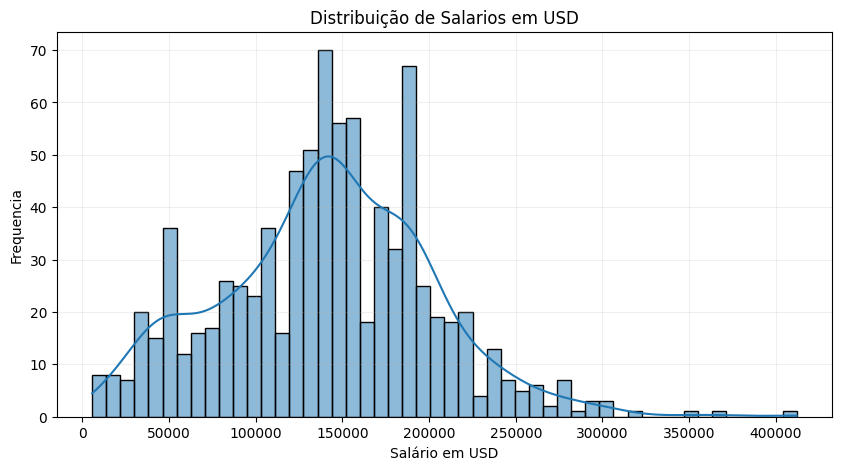

In [11]:
# Analisando detalhes de forma visual a distribuição geral do salario

plt.figure(figsize=(10, 5))
sns.histplot(data=data_scientist_df, x='salario_em_usd', palette='tab10', kde=True, bins = 50) # Use histplot instead of distplot
plt.xlabel('Salário em USD')
plt.ylabel('Frequencia')
plt.grid(alpha = 0.2)
plt.title('Distribuição de Salarios em USD')
plt.show()

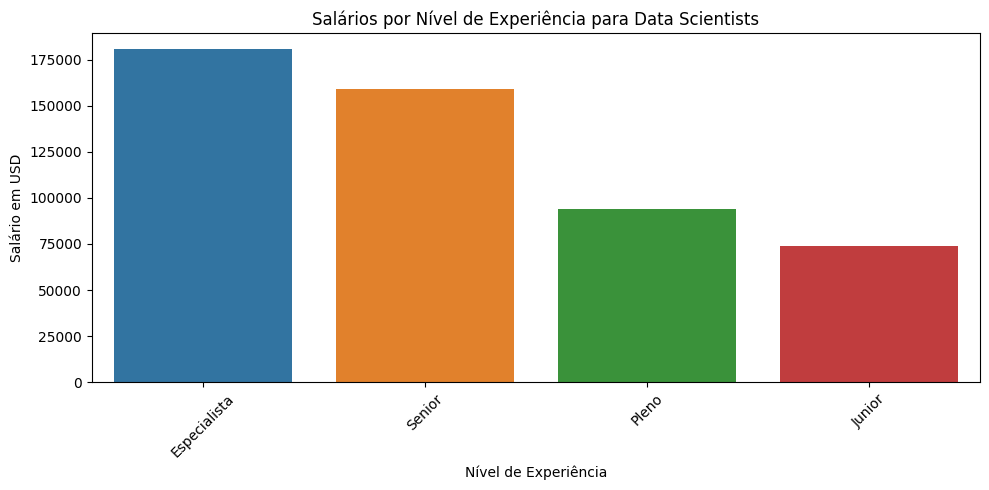

In [12]:
# Analisando detalhes de forma visual media salarial em relação ao nivel de experiencia
plt.figure(figsize=(10, 5))
sns.barplot(x='nivel_de_experiencia', y='salario_em_usd', palette='tab10', data=Data_Scientist)
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário em USD')
plt.title('Salários por Nível de Experiência para Data Scientists')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

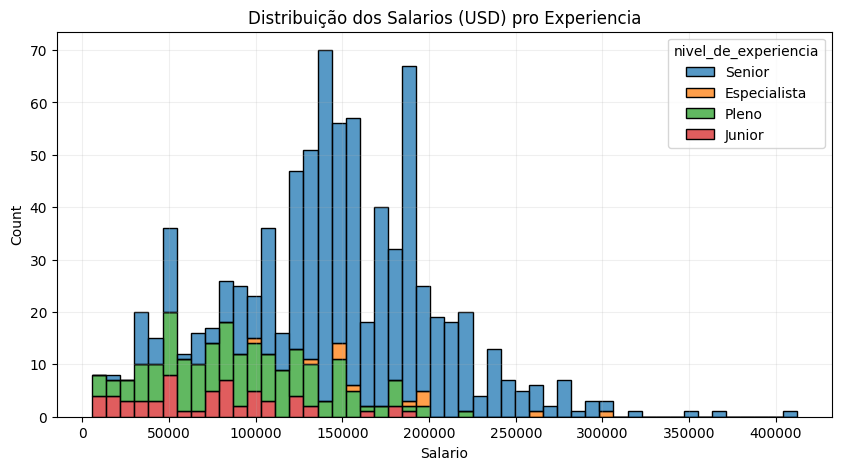

In [13]:
# Analisando detalhes da distribuição dos salarios em relação so nivel de experiencia
plt.figure(figsize = (10, 5))

sns.histplot(x = 'salario_em_usd', hue = 'nivel_de_experiencia', multiple = 'stack', palette='tab10', bins = 50, data = data_scientist_df)

plt.grid(alpha = 0.2)
plt.title('Distribuição dos Salarios (USD) pro Experiencia')
plt.xlabel('Salario')
plt.ylabel('Count')
plt.show()

In [14]:
# Analisando media salarial em relação ao tipo de emprego
Data_Scientist = data_scientist_df
Data_Scientist = Data_Scientist[['tipo_de_emprego','salario_em_usd']].groupby('tipo_de_emprego').mean()
Data_Scientist = Data_Scientist.sort_values(by='salario_em_usd',ascending=False).reset_index()
Data_Scientist

,tipo_de_emprego,salario_em_usd
0,Tempo Integral,141147.050239
1,Freelance,100000.000000
2,Meio Período,77223.000000


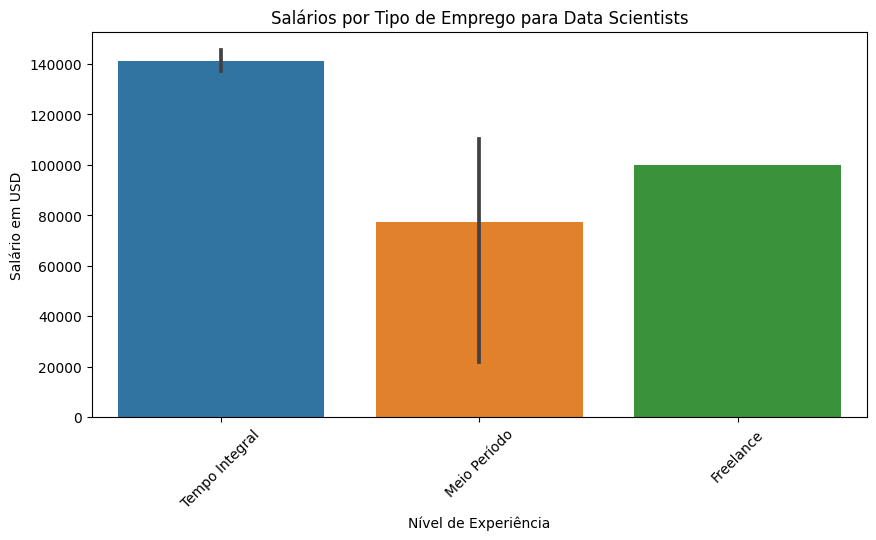

In [15]:
# Analisando detalhes da media salarial em relação ao tipo de emprego
plt.figure(figsize=(10, 5))
sns.barplot(x='tipo_de_emprego', y='salario_em_usd', palette='tab10', data=data_scientist_df)
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário em USD')
plt.title('Salários por Tipo de Emprego para Data Scientists')
plt.xticks(rotation=45)

plt.show()

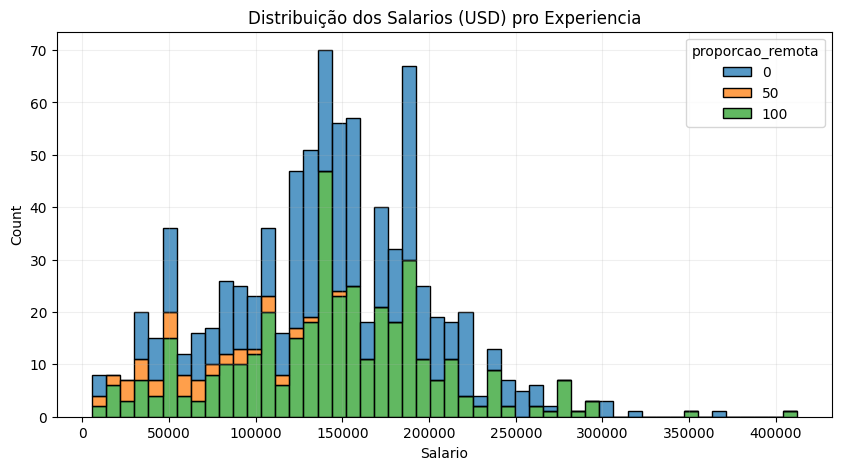

In [16]:
# Analisando distribuição do Salario (USD) por Proporcão de trabalho Remoto
plt.figure(figsize = (10, 5))

sns.histplot(x = 'salario_em_usd', hue = 'proporcao_remota', multiple = 'stack', palette='tab10', bins = 50, data = data_scientist_df)

plt.grid(alpha = 0.2)
plt.title('Distribuição dos Salarios (USD) pro Experiencia')
plt.xlabel('Salario')
plt.ylabel('Count')
plt.show()